# Predictive model - School shootings in the US

#### Block 2 - Fundamentals of Machine Learning
M Data-driven Design <br>
Evi Franken </br><br>
1786080</br>

______________________________________________________________________________________________________________________

# 1. Introduction

#### 1.1 Context 
At April 20, 1999 a school shooting and attempted bombing occured at a High School in Columbine, Colorado. It was the deadliest high school shooting in the US until 2018. Since then 'Columbine' has become a byword for school shootings. This heartbreaking massacre made a big impact on the whole world, but most importantly on the children who were exposed to the school shootings. More than 240,000 students have experienced gun violence at school since Columbine (Analysis | More than 240,000 Students Have Experienced Gun Violence at School since Columbine, 2018). Unfortunately, the federal government in the United States does not track school shootings. Therefore journalists from The Washington Post have spend a year determining how many children have ben effected and documented it into 1 dataframe. 

#### 1.2 The research question
<i>"'Given the relationship of the shooter, school type, whether a an officer at , X4, ... how well can the casualties be predicted'"</i>

#### 1.3 Practical relevance 
The dataset seems rich and contains many types of information. However there are a lot of variables that contain a lot of NaN's and there aren't a lot of entries (this is caused by the federal government that doesnt track these school shootings). It's not a lot, and it makes it a bit harder for machine learning, as I don't have a lot of data to choose from in order to make the best prediction. However I think its a very interesting (and a little grim as well) topic, so this will motivate me. Thus, I'll try to make the best out of it.

______________________________________________________________________________________________________________________

# 2. The data-set


### 2.1 The acquired the data

I found the dataset while searching through Google. This showed me a research report by the Washington Post (https://www.washingtonpost.com/graphics/2018/local/school-shootings-database/). This report contained some shocking stats and as a result of looking into this I found out they had a corresponding dataset. I quickly analyzed it on Github, and decided dat due to the shocking/interesting topic, the accompanied layout information and the rich amount of columns I would start my Machine learning with this dataset.

The original and raw dataset has: 
<ul>
  <li><i>237 entries</i></li>
  <li><i>50 columns (variables)</i></li>
</ul>

______________________________________________________________________________________________________________________

<b>First the limitations of the dataset</b>


There are variables that are not of interest because of their wide and unique categorical ratio: e.g. school state, school id, county and ulocale etc.

Then there are some variables that for me seemed a little bit too grim: including race/ethnicity of the schools. Eventhough the variables would be very helpful, I don't feel comfortable by using these.

And finally the datasest contains a lot of variables with too many NaN's.

______________________________________________________________________________________________________________________

### 2.2 Data cleaning

In [576]:
import pandas as pd #libarary for data manipulation and analysis
import numpy as np
import seaborn as sns #The plotting library
import matplotlib.pyplot as plt #Matplotlib for setting the labels in the Seaborn graphs
from sklearn.model_selection import train_test_split #We need this to split the data

#sets the limit of displaying rows to none
pd.set_option("display.max_rows", None, "display.max_columns", None)

There are a lot of columns in this dataset that contain many NaNs. It therefore wouldn't work to drop the NaN immediately. I first need to check for variables (around 10) that have little to no NaN's. Then I subset the dataframe and leave out the NaN's.

First I have a quick look at all variables, by using <i>df.head( )</i>.

In [577]:
df = pd.read_csv('school_shootings.csv')
df.head(5)

,uid,nces_school_id,school_name,nces_district_id,district_name,date,school_year,year,time,day_of_week,city,state,school_type,enrollment,killed,injured,casualties,shooting_type,age_shooter1,gender_shooter1,race_ethnicity_shooter1,shooter_relationship1,shooter_deceased1,deceased_notes1,age_shooter2,gender_shooter2,race_ethnicity_shooter2,shooter_relationship2,shooter_deceased2,deceased_notes2,white,black,hispanic,asian,american_indian_alaska_native,hawaiian_native_pacific_islander,two_or_more,resource_officer,weapon,weapon_source,lat,long,staffing,low_grade,high_grade,lunch,county,state_fips,county_fips,ulocale
0,1,080480000707,Columbine High School,804800.0,Jefferson County R-1,4/20/1999,1998-1999,1999,11:19 AM,Tuesday,Littleton,Colorado,public,1965,13,21,34,indiscriminate,18.0,m,w,student,1.0,suicide,17.0,m,w,student,1.0,suicide,1783,16.0,112.0,42.0,12.0,NaN,NaN,1,12-gauge Savage-Springfield 67H pump-action sh...,purchased from friends,39.603910,-105.075000,89.6,9,12,41.0,Jefferson County,8,8059,21.0
1,2,220054000422,Scotlandville Middle School,2200540.0,East Baton Rouge Parish School Board,4/22/1999,1998-1999,1999,12:30 PM,Thursday,Baton Rouge,Louisiana,public,588,0,1,1,targeted,14.0,m,NaN,former student (expelled),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,583.0,0.0,0.0,0.0,NaN,NaN,0,.22-caliber handgun,NaN,30.529958,-91.169966,39.0,6,8,495.0,East Baton Rouge Parish,22,22033,12.0
2,3,130441001591,Heritage High School,1304410.0,Rockdale County,5/20/1999,1998-1999,1999,8:03 AM,Thursday,Conyers,Georgia,public,"1,369",0,6,6,indiscriminate,15.0,m,w,student,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1189,136.0,28.0,15.0,1.0,NaN,NaN,1,".22-caliber rifle, .357-caliber Magnum handgun",NaN,33.626922,-84.047960,84.0,9,12,125.0,Rockdale County,13,13247,21.0
3,4,421899003847,John Bartram High School,4218990.0,Philadelphia City SD,10/4/1999,1999-2000,1999,10:00 AM,Monday,Philadelphia,Pennsylvania,public,3147,0,1,1,targeted,17.0,m,NaN,student,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209,2736.0,27.0,170.0,5.0,NaN,NaN,1,RG .25-caliber handgun,purchased from friend,39.921509,-75.234108,41.0,9,12,2007.0,Philadelphia County,42,42101,11.0
4,5,250279000225,Dorchester High School,2502790.0,Boston,11/3/1999,1999-2000,1999,7:40 AM,Wednesday,Boston,Massachusetts,public,"1,116",0,1,1,targeted,NaN,m,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,755.0,287.0,29.0,5.0,NaN,NaN,0,NaN,NaN,42.285268,-71.075901,NaN,9,12,543.0,Suffolk County,25,25025,11.0


______________________________________________________________________________________________________________________

##### Selecting my variables

I I selected 8 variables that I thought would have little to no NaN's, and that were not too large of a ratio (e.g. state & city).

These are: 
<ul>
  <li><i>day of week</i></li>
  <li><i>casualties</i></li>
  <li><i>school_type</i></li>
  <li><i>enrollment</i></li>
  <li><i>shooting_type</i></li>
  <li><i>gender_shooter1</i></li>
  <li><i>resource_officer</i></li>
</ul>

I think that 'shooter_relationship1' is also an interesting variable, as it can help me with spinning it into a positive assignment: schools and police departments can learn from this by surveillance and detecting problems in school. But is does have more NaN's compared to some other variables. So let's look into this variable and then decide.

______________________________________________________________________________________________________________________

##### Deciding to leave out or include the column 'shooter relationship'

I want to check the amount of entries when including this variable and by dropping the NaN's. Then by showing the info of the dataframe I can make a decision.

In [578]:
test = df[['day_of_week', 'casualties', 'school_type', 'enrollment', 'shooting_type', 'gender_shooter1', 'resource_officer']]
test = test.dropna() #leaving out all rows with NaNs
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 0 to 236
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   day_of_week       222 non-null    object
 1   casualties        222 non-null    int64 
 2   school_type       222 non-null    object
 3   enrollment        222 non-null    object
 4   shooting_type     222 non-null    object
 5   gender_shooter1   222 non-null    object
 6   resource_officer  222 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 13.9+ KB


So it shows me the the dataframe contains of 222 entries.

In [579]:
df2 = df[['day_of_week', 'casualties', 'school_type', 'enrollment', 'shooting_type', 'gender_shooter1', 'shooter_relationship1', 'resource_officer']]
df2 = df2.dropna() #leaving out all rows with NaNs
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 236
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   day_of_week            185 non-null    object
 1   casualties             185 non-null    int64 
 2   school_type            185 non-null    object
 3   enrollment             185 non-null    object
 4   shooting_type          185 non-null    object
 5   gender_shooter1        185 non-null    object
 6   shooter_relationship1  185 non-null    object
 7   resource_officer       185 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 13.0+ KB


Including the shooter_relationship, I have 185 entries. After consulation with other students, <i>I decided to keep the variable 'shooter_relationship'</i>. It gives me less rows, but 185 is just enough and I think this variable is interesting enough. The next step would be to have a look at the data frame and see what columns and values need cleaning.

______________________________________________________________________________________________________________________

##### What variables need cleaning?

In [580]:
df2.head(5)

,day_of_week,casualties,school_type,enrollment,shooting_type,gender_shooter1,shooter_relationship1,resource_officer
0,Tuesday,34,public,1965,indiscriminate,m,student,1
1,Thursday,1,public,588,targeted,m,former student (expelled),0
2,Thursday,6,public,"1,369",indiscriminate,m,student,1
3,Monday,1,public,3147,targeted,m,student,1
5,Friday,1,public,753,accidental or targeted,m,student,0


To make the predictions easier, I will classify the column casualties as a 1 / 0 (yes/no) value. For the same reason I will make dummies out of the variables shooting_type and shooter_relationship. Dummy variables are numeric, and represent the sub-categories of a categorical variable in the dataset. The main benefit of using dummies is because dummies are simple.

______________________________________________________________________________________________________________________

##### 1. Changing casualties in to a yes no variable (0/1)

In [581]:
df2['casualties_number']= df2['casualties'] # adding another column so I will always have the number in here as well
df2.loc[df2['casualties'] > 0, 'casualties'] = 1 #adding a 1 for casualties and a 0 for no casualties
df2.head(15)

,day_of_week,casualties,school_type,enrollment,shooting_type,gender_shooter1,shooter_relationship1,resource_officer,casualties_number
0,Tuesday,1,public,1965,indiscriminate,m,student,1,34
1,Thursday,1,public,588,targeted,m,former student (expelled),0,1
2,Thursday,1,public,"1,369",indiscriminate,m,student,1,6
3,Monday,1,public,3147,targeted,m,student,1,1
5,Friday,1,public,753,accidental or targeted,m,student,0,1
6,Monday,1,public,407,indiscriminate,m,student,0,5
7,Wednesday,1,public,1852,accidental,m,student,1,1
8,Wednesday,0,public,734,targeted,m,none,0,0
9,Monday,1,public,736,accidental,m,student,0,1
11,Thursday,0,public,711,targeted,m,former boyfriend of student,0,0


______________________________________________________________________________________________________________________

##### 2. Cleaning up the variable shooter_relationship

To convert the shooter_relationship into dummies, I first have to take a look at all the values to determine which variables I want to include and/or combine.

In [582]:
df2["shooter_relationship1"].value_counts()

student                                                      121
none                                                           8
former student                                                 7
parent of student                                              6
resource officer                                               5
former student (expelled)                                      5
student                                                        4
spouse of teacher                                              3
teacher                                                        2
boyfriend of student                                           1
security guard                                                 1
father of student                                              1
student (suspended)                                            1
not a student but often hung around the school                 1
friend of student                                              1
brother of student       

The first thing I notice is that there are two values of student. Let's have a look at the difference by showing their unique values.

In [583]:
df2.shooter_relationship1.unique()

array(['student', 'former student (expelled)', 'none',
       'former boyfriend of student', 'parent of student',
       'spouse of teacher', 'student in summer school',
       'not a student but often hung around the school',
       'student (suspended)', 'multiple officers', 'security guard',
       'former student', 'father of football player',
       'dating mother of student', 'SWAT officer', 'resource officer',
       'none; worked in community', 'boyfriend of student', 'non-student',
       'ex-boyfriend of student', 'janitor', 'police officer',
       'student at neighboring school, rode bus with some victims',
       'fired teacher', 'suspended student from different campus',
       'student ', 'father of student', 'student at rival school',
       'friend of student', 'brother of student', 'teacher',
       "former boyfriend of student's mother", 'substitute teacher'],
      dtype=object)

The difference is a space behind the word. So let's see if we can combine these two columns.

Also the result of displaying all values for the variable shooter_relationship, shows me there are a too many specific values. And a lot of values that only consist of 1 count. Most values can be combined into one column. So student in summerschool can be merged into the value of just a student. Thus, I want to simplify this by using broader categories such as: parents, student and teachers. I will create a column of remaining values to combine the more random variables. This way I will only have a few columns which is better when I convert them into dummies.

In [584]:
df2["shooter_relationship1"].replace({"former student (expelled)": "student",
                                     "former student (suspended)": "student",
                                     "former student":"student",
                                     "former boyfriend of student": "boyfriend",
                                     "boyfriend of student":"boyfriend",
                                     "parent of student":"parent",
                                     "student in summer school":"remaining",
                                     "not a student but often hung around the school":"remaining",
                                     "none":"remaining",
                                     "multiple officers":"remaining",
                                     "security guard":"officer",
                                     "multiple officers":"officer",
                                     "father of football player":"parent",
                                     "dating mother of student":"parent",
                                     "SWAT officer":"officer",
                                     "none; worked in community":"remaining",
                                     "resource officer":"officer",
                                     "spouse of teacher":"teacher",
                                     "non-student":"remaining",
                                     "ex-boyfriend of student":"boyfriend",
                                     "police officer":"officer",
                                     "janitor":"remaining",
                                     "student at neighboring school, rode bus with some victims":"remaining",
                                     "fired teacher":"teacher",
                                     "suspended student from different campus":"remaining",
                                     "student at rival school":"remaining",
                                     "father of student":"parent",
                                     "friend of student":"remaining",
                                     "brother of student":"remaining",
                                     "former boyfriend of student's mother":"parent",
                                     "substitute teacher":"teacher",
                                     "student ":"student",
                                     "student (suspended)":"student"
                                    }, inplace=True)

I changed a lot of values, so let's quickly check if it looks allright.

In [585]:
df2["shooter_relationship1"].value_counts()

student      138
remaining     18
parent        10
officer        9
teacher        7
boyfriend      3
Name: shooter_relationship1, dtype: int64

All ready.

______________________________________________________________________________________________________________________

##### 3. Cleaning up the variable shooting_type

The same for the variable of shooting_type. To convert the shooting_type into dummies, I first have to take a look at all the values to determine if I need to clean up some values.

In [586]:
df2["shooting_type"].value_counts()

targeted                       107
indiscriminate                  39
accidental                      22
targeted and indiscriminate      5
public suicide                   4
unclear                          3
hostage suicide                  2
accidental or targeted           2
public suicide (attempted)       1
Name: shooting_type, dtype: int64

There are a few values I want to combine such as public suicide and hostage suicide. But other then that, the variable is ready to convert into dummies.

In [587]:
df2["shooting_type"].replace({"targeted and indiscriminate": "unclear",
                                      "public suicide":"suicide",
                                      "public suicide (attempted)":"suicide",
                                      "accidental or targeted":"unclear",
                                      "hostage suicide":"suicide"
                                    }, inplace=True)

______________________________________________________________________________________________________________________

##### 4. Dummies of variables shooter_relationship and shooting_type

Now Let's make dummies out of these variables.

In [588]:
dummies = pd.get_dummies(df2[['shooter_relationship1', 'shooting_type']]) #selecting the variables
df3 = df2.merge(dummies, left_index= True, right_index= True)
df3.info()
df3.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 236
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   day_of_week                      185 non-null    object
 1   casualties                       185 non-null    int64 
 2   school_type                      185 non-null    object
 3   enrollment                       185 non-null    object
 4   shooting_type                    185 non-null    object
 5   gender_shooter1                  185 non-null    object
 6   shooter_relationship1            185 non-null    object
 7   resource_officer                 185 non-null    int64 
 8   casualties_number                185 non-null    int64 
 9   shooter_relationship1_boyfriend  185 non-null    uint8 
 10  shooter_relationship1_officer    185 non-null    uint8 
 11  shooter_relationship1_parent     185 non-null    uint8 
 12  shooter_relationship1_remaining  185

,day_of_week,casualties,school_type,enrollment,shooting_type,gender_shooter1,shooter_relationship1,resource_officer,casualties_number,shooter_relationship1_boyfriend,shooter_relationship1_officer,shooter_relationship1_parent,shooter_relationship1_remaining,shooter_relationship1_student,shooter_relationship1_teacher,shooting_type_accidental,shooting_type_indiscriminate,shooting_type_suicide,shooting_type_targeted,shooting_type_unclear
0,Tuesday,1,public,1965,indiscriminate,m,student,1,34,0,0,0,0,1,0,0,1,0,0,0
1,Thursday,1,public,588,targeted,m,student,0,1,0,0,0,0,1,0,0,0,0,1,0
2,Thursday,1,public,"1,369",indiscriminate,m,student,1,6,0,0,0,0,1,0,0,1,0,0,0


I quickly rename the columns, just for the convenience of working with the variable names.

In [589]:
df3 = df3.rename(columns={'gender_shooter1': 'gender_shooter', 
                          'shooter_relationship1_boyfriend': 'S_R_boyfriend',
                          'shooter_relationship1_officer': 'S_R_officer',
                          'shooter_relationship1_parent': 'S_R_parent',
                          'shooter_relationship1_remaining': 'S_R_remaining',
                          'shooter_relationship1_student': 'S_R_student',
                          'shooter_relationship1_teacher': 'S_R_teacher',
                          'shooting_type_accidental':'S_type_accidental',
                          'shooting_type_indiscriminate':'S_type_indiscriminate',
                          'shooting_type_suicide':'S_type_suicide',
                          'shooting_type_targeted':'S_type_targeted',
                          'shooting_type_unclear':'S_type_unclear',
                          })

df3.head(5)

,day_of_week,casualties,school_type,enrollment,shooting_type,gender_shooter,shooter_relationship1,resource_officer,casualties_number,S_R_boyfriend,S_R_officer,S_R_parent,S_R_remaining,S_R_student,S_R_teacher,S_type_accidental,S_type_indiscriminate,S_type_suicide,S_type_targeted,S_type_unclear
0,Tuesday,1,public,1965,indiscriminate,m,student,1,34,0,0,0,0,1,0,0,1,0,0,0
1,Thursday,1,public,588,targeted,m,student,0,1,0,0,0,0,1,0,0,0,0,1,0
2,Thursday,1,public,"1,369",indiscriminate,m,student,1,6,0,0,0,0,1,0,0,1,0,0,0
3,Monday,1,public,3147,targeted,m,student,1,1,0,0,0,0,1,0,0,0,0,1,0
5,Friday,1,public,753,unclear,m,student,0,1,0,0,0,0,1,0,0,0,0,0,1


______________________________________________________________________________________________________________________

##### 5. Converting the variable 'enrollment'

The variable enrollment uses comma's for values over 1000. This was causing trouble. Therefore I changed the the type from object into a int64, so I can easily use this for my visualizations and predictions. Converting it directly into an integer was not possible. Therefore I first changed it into a string and after that I dropped the comma's and changed the type into an integer.



In [590]:
# converting the variable enrollment to a string
df['enrollment'] = df['enrollment'].astype(str)

# replacing the comma and converting to an integer
df3['enrollment'] = df3['enrollment'].str.replace(',', '').astype(int)

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 236
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   day_of_week            185 non-null    object
 1   casualties             185 non-null    int64 
 2   school_type            185 non-null    object
 3   enrollment             185 non-null    int64 
 4   shooting_type          185 non-null    object
 5   gender_shooter         185 non-null    object
 6   shooter_relationship1  185 non-null    object
 7   resource_officer       185 non-null    int64 
 8   casualties_number      185 non-null    int64 
 9   S_R_boyfriend          185 non-null    uint8 
 10  S_R_officer            185 non-null    uint8 
 11  S_R_parent             185 non-null    uint8 
 12  S_R_remaining          185 non-null    uint8 
 13  S_R_student            185 non-null    uint8 
 14  S_R_teacher            185 non-null    uint8 
 15  S_type_accidental      

The data is now ready for further analysis!

______________________________________________________________________________________________________________________

### 2.2 Feature engineering

????????????

______________________________________________________________________________________________________________________

### 2.2 Data visualizations

##### 1. Choosing my variables for prediction (by correlations)

First I'll start with finding the most strongly correlating variables so I know which variables can be of use and which don't. I want to predict the casualties, so by sorting the values on casualties I can read the matrix in a more convenient way.

In [591]:
corr = df3.corr().sort_values('casualties', ascending=False)
corr

,casualties,enrollment,resource_officer,casualties_number,S_R_boyfriend,S_R_officer,S_R_parent,S_R_remaining,S_R_student,S_R_teacher,S_type_accidental,S_type_indiscriminate,S_type_suicide,S_type_targeted,S_type_unclear
casualties,1.000000,0.067670,0.153110,0.257155,-0.023381,0.074252,0.029682,-0.101687,0.001696,0.050654,0.214401,-0.155008,-0.339805,0.130344,-0.025230
casualties_number,0.257155,0.100965,0.155631,1.000000,-0.038544,-0.052011,-0.060016,-0.025565,0.097609,-0.027708,-0.052840,0.386390,-0.087383,-0.248632,-0.004627
S_type_accidental,0.214401,0.005138,-0.133293,-0.052840,-0.047167,-0.005455,-0.013972,-0.120613,0.060961,0.102186,1.000000,-0.189877,-0.072855,-0.430291,-0.087821
resource_officer,0.153110,0.224595,1.000000,0.155631,-0.018847,0.171509,-0.100009,-0.048194,0.051948,-0.106046,-0.133293,-0.021885,-0.163747,0.147628,0.046057
S_type_targeted,0.130344,-0.040636,0.147628,-0.248632,0.109618,0.142192,0.155689,0.058697,-0.221680,-0.002791,-0.430291,-0.605342,-0.232265,1.000000,-0.279979
S_R_officer,0.074252,0.024452,0.171509,-0.052011,-0.029033,1.000000,-0.054056,-0.074241,-0.387486,-0.044844,-0.005455,-0.116875,-0.044844,0.142192,-0.054056
enrollment,0.067670,1.000000,0.224595,0.100965,-0.043126,0.024452,-0.221766,0.029764,0.135433,-0.091433,0.005138,-0.004694,-0.014221,-0.040636,0.101854
S_R_teacher,0.050654,-0.091433,-0.106046,-0.027708,-0.025460,-0.044844,-0.047405,-0.065105,-0.339805,1.000000,0.102186,-0.033038,-0.039326,-0.002791,-0.047405
S_R_parent,0.029682,-0.221766,-0.100009,-0.060016,-0.030691,-0.054056,1.000000,-0.078480,-0.409611,-0.047405,-0.013972,-0.123548,-0.047405,0.155689,-0.057143
S_R_student,0.001696,0.135433,0.051948,0.097609,-0.219996,-0.387486,-0.409611,-0.562560,1.000000,-0.339805,0.060961,0.118971,0.115731,-0.221680,0.084594


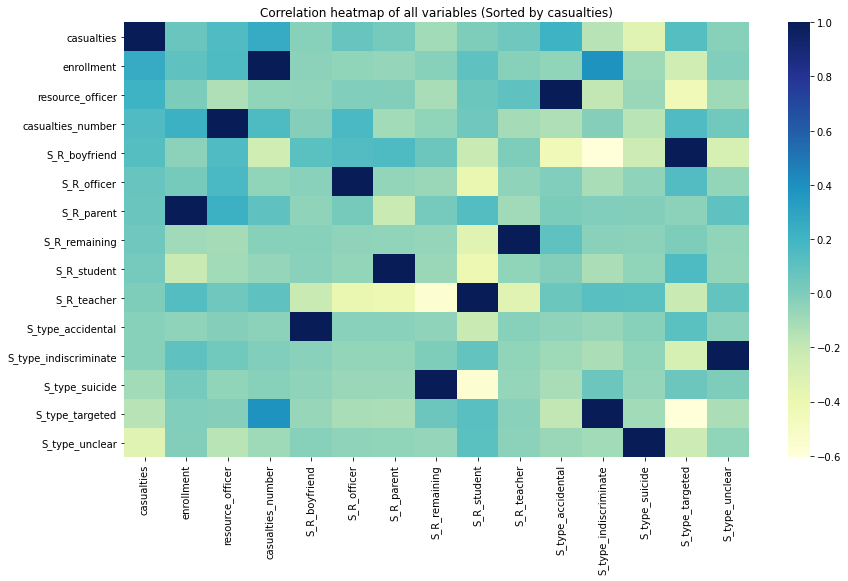

In [592]:
# Let's plot the correlation into a heatmap
# I used: annot = True, to also display the corr values. But for now, just the colors will do.
plt.figure(figsize=(14,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='YlGnBu') #the last two arguments set the column names
plt.title("Correlation heatmap of all variables (Sorted by casualties)")
plt.show()

<b>The most interesting correlations with casualties are:</b>
<ul>
  <li><i>enrollment</i></li>
  <li><i>resource_officer</i></li>
  <li><i>S_R_boyfriend</i></li>
  <li><i>S_R_officer</i></li>
</ul>
The remaining values have very similar correlations.


<b>Strong correlations between other values (so not direct in relation to casualties):</b>
<ul>
  <li><i>S_R_parent + enrollment</i></li>
  <li><i>Casualties_number + S_type_targeted</i></li>  
  <li><i>Casualties_number + resource_officer</i></li>
  <li><i>Casualties_number + enrollment</i></li>
  <li><i>S_R_boyfriend + S_type_accidental</i></li>
  <li><i>S_R_officer + S_R_officer</i></li>
  <li><i>S_R_student + S_R_parent</i></li>
  <li><i>S_R_remaining + S_type_suicide</i></li>
  <li><i>S_R_teacher + S_R_student</i></li>
  <li><i>S_R_officer + S_type_accidental</i></li>
  <li><i>enrollment + S_type_indiscriminate</i></li>
  <li><i>S_type_targeted + S_type_indiscriminate</i></li>
  <li><i>S_type_suicide + S_type_unclear</i></li>
  <li><i>S_type_indiscriminate + S_type_unclear</i></li>
  <li><i>S_R_boyfriend + S_type_targeted</i></li>
</ul>

The confusing part here is the different relations between casualties and values + casualties_numbers and values. Casualties are the dummies of casualties_numbers so I was expecting them to be the same. Could not find the answer to this, in the limited time left.

______________________________________________________________________________________________________________________

##### 2. Visualizing the resource of an officer at school

Let's start with visualizing some of the variables that had a high correlation with casualties. 

Text(0, 0.5, 'The resource of an officer at school')

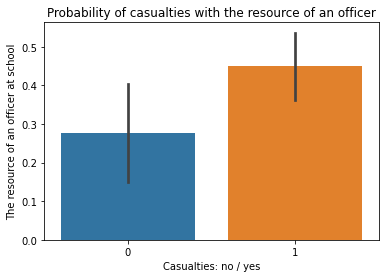

In [593]:
sns.barplot(x="casualties", y="resource_officer", data=df3)
plt.title("Probability of casualties with the resource of an officer")
plt.xlabel('Casualties: no / yes')
plt.ylabel('The resource of an officer at school')

Not 100% sure why it gives me no exact full number. However, here you can see on the y-axis that the schools with an officer, had more casualties compared to schools without a resource officer. Ofcourse this also can have something to do with the enrollment, as school with more students might need more surveillance in order to facilitate and secure everything. So let's check that out, by visualizing the casualties and enrollment.

______________________________________________________________________________________________________________________

##### 3. Visualizing values of the school enrollment

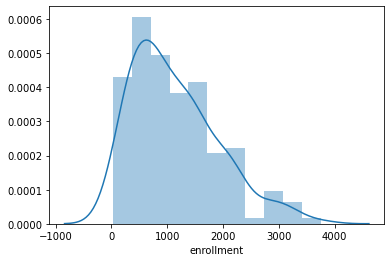

In [594]:
sns.distplot(df3['enrollment'])

WRITE DOWN THE RESULT!!!!!!!!!!!

______________________________________________________________________________________________________________________

##### 4. Visualizing the density of casualties for school enrollment

Text(0, 0.5, 'Enrollment of school')

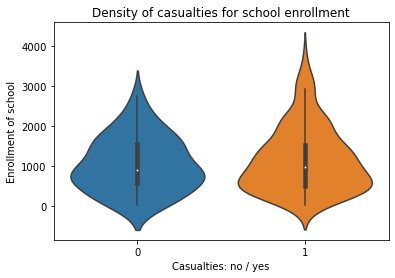

In [595]:
sns.violinplot(data=df3, x='casualties', y='enrollment')
plt.title("Density of casualties for school enrollment")
plt.xlabel('Casualties: no / yes')
plt.ylabel('Enrollment of school')

You can see that the highest number of enrollment for no casualties was around 3500 students. While when there were casualties, it went up to even schools from over 4000 students. However you can see that the median and the interquartile range are not that different. The density estimation (how wide the shape is) represent the higher probability of the given value: in this case around +/- 700/800 students.

This shows that there might be very small link between the enrollment the school, the resource officer and the casualties, but as this graph shows it's not strong enough to disgard this correlation. <i>Therefore I want to include these variables in my prediction.</i>

I also want to check the role of an officer being the shooter and the casualties. So let's continue with that.

______________________________________________________________________________________________________________________

##### 5. Officer being the shooter vs. casualties (and the resource of an officer at school)

Text(0, 0.5, 'title')

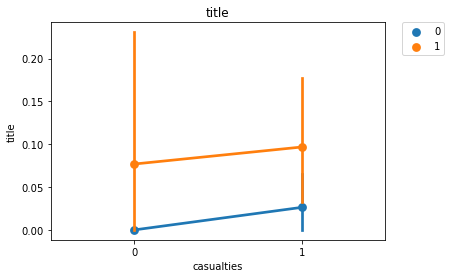

In [596]:
sns.pointplot(data=df3, x='casualties', y='S_R_officer', hue='resource_officer')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #moving the legend to the side otherwise it blocked the graph
plt.title("title")
plt.xlabel('casualties')
plt.ylabel('title')

WRITE DOWN THE RESULT!!!!!!!!!!!

______________________________________________________________________________________________________________________

##### 6. Casualties when the relationship of the shooter is a boyfriend

Text(6.799999999999997, 0.5, 'Shooter relationship: boyfriend')

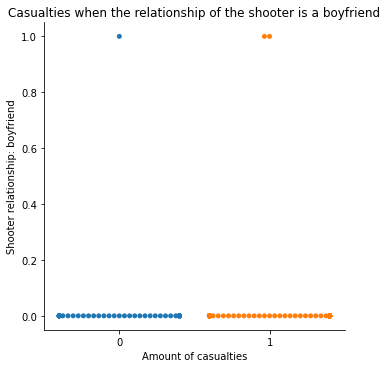

In [597]:
sns.catplot(x="casualties", y="S_R_boyfriend", kind="swarm", data=df3)
plt.title("Casualties when the relationship of the shooter is a boyfriend")
plt.xlabel('Amount of casualties')
plt.ylabel('Shooter relationship: boyfriend')

We want to predict the casualties. You can read this as for almost all occasions of casualties or non-casualties there was no boyfriend involved. However, when the shooter relationship is a boyfriend than then you get one dot with no casualties and 2 dots for casualties. This shows that 2 out of 3 shootings will be <b>with</b> casualties. So this therefore will show a strong correlation. I will thus add this variable this in my prediction.

______________________________________________________________________________________________________________________

##### 7. Checking the difference between casualties and casualties number

TEST!!! & ASK. Cras ultricies ligula sed magna dictum porta. Curabitur arcu erat, accumsan id imperdiet et, porttitor at sem. Curabitur arcu erat, accumsan id imperdiet et, porttitor at sem. Donec sollicitudin molestie malesuada. Cras ultricies ligula sed magna dictum porta.

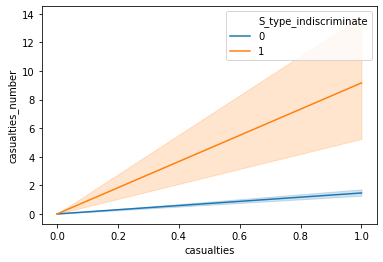

In [598]:
sns.lineplot(data=df3, x="casualties", y="casualties_number", hue="S_type_indiscriminate")

Cras ultricies ligula sed magna dictum porta. Curabitur arcu erat, accumsan id imperdiet et, porttitor at sem. Curabitur arcu erat, accumsan id imperdiet et, porttitor at sem. Donec sollicitudin molestie malesuada. Cras ultricies ligula sed magna dictum porta.

______________________________________________________________________________________________________________________


## 3.0 Predictive model

WRITE DOWN THE RESULT!!!!!!!!!!!
Cras ultricies ligula sed magna dictum porta. Curabitur arcu erat, accumsan id imperdiet et, porttitor at sem. Curabitur arcu erat, accumsan id imperdiet et, porttitor at sem. Donec sollicitudin molestie malesuada. Cras ultricies ligula sed magna dictum porta.

______________________________________________________________________________________________________________________


### 3.1 Training the algorithm

K- Nearest Neighbors or also known as K-NN is one of the simplest and strongest algorithm which belongs to the family of supervised machine learning algorithms which means we use labeled (Target Variable) dataset to predict the class of new data point. It is use for mostly in classification problems and as well as regression problems. KNN also called as the non-parametric, lazy learning algorithm.
It is commonly used for its easy of interpretation and low calculation time. The working flow of the algorithm is follow. The “K” in the KNN algorithm is the nearest neighbor we wish to take the vote from.

Cras ultricies ligula sed magna dictum porta. Curabitur arcu erat, accumsan id imperdiet et, porttitor at sem. Curabitur arcu erat, accumsan id imperdiet et, porttitor at sem. Donec sollicitudin molestie malesuada. Cras ultricies ligula sed magna dictum porta.

In [599]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import sklearn as sk

X = df3[['resource_officer', 'enrollment','S_R_officer', 'S_R_boyfriend', 'S_type_accidental', 'S_R_student', 'S_R_parent', 'S_R_teacher', 'S_type_suicide']]
y = df3['casualties']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_train.head()

,resource_officer,enrollment,S_R_officer,S_R_boyfriend,S_type_accidental,S_R_student,S_R_parent,S_R_teacher,S_type_suicide
31,0,151,0,0,0,1,0,0,0
49,1,1090,0,0,0,1,0,0,0
110,0,292,0,0,0,1,0,0,0
36,0,297,0,0,0,0,1,0,0
58,0,1012,0,0,0,1,0,0,0


### 3.2 Classification with k-nearest neigbor (KNN)

In [600]:
from sklearn.neighbors import KNeighborsClassifier #the object class we need

knn = KNeighborsClassifier(n_neighbors=5) #create a KNN-classifier with 5 neighbors (default)
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data
knn.score(X_test, y_test) #calculate the fit on the test data

0.7142857142857143

Cras ultricies ligula sed magna dictum porta. Curabitur arcu erat, accumsan id imperdiet et, porttitor at sem. Curabitur arcu erat, accumsan id imperdiet et, porttitor at sem. Donec sollicitudin molestie malesuada. Cras ultricies ligula sed magna dictum porta.

______________________________________________________________________________________________________________________

### 3.3 Evaluating the model

In [601]:
from sklearn.metrics import confusion_matrix

y_test_pred = knn.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_test_pred) #creates a "confusion matrix"
cm

array([[ 2, 13],
       [ 3, 38]])

To know which row/column is which value we can use the object 'classes'

In [602]:
knn.classes_

array([0, 1])

Cras ultricies ligula sed magna dictum porta. Curabitur arcu erat, accumsan id imperdiet et, porttitor at sem. Curabitur arcu erat, accumsan id imperdiet et, porttitor at sem. Donec sollicitudin molestie malesuada. Cras ultricies ligula sed magna dictum porta.

In [603]:
y_pred = knn.predict(X_test) #the predicted values
conf_matrix = confusion_matrix(y_test, y_pred) #creates a "confusion matrix"
conf_matrix = pd.DataFrame(cm, index=['casualties (actual)', 'non-casualties (actual)'], columns = ['casualties (predicted)', 'non-casualties (predicted)']) 
conf_matrix

,casualties (predicted),non-casualties (predicted)
casualties (actual),2,13
non-casualties (actual),3,38


Cras ultricies ligula sed magna dictum porta. Curabitur arcu erat, accumsan id imperdiet et, porttitor at sem. Curabitur arcu erat, accumsan id imperdiet et, porttitor at sem. Donec sollicitudin molestie malesuada. Cras ultricies ligula sed magna dictum porta.

______________________________________________________________________________________________________________________

### 3.4 Parameter setting

In [604]:
from sklearn.metrics import classification_report

for i in range(1,8):
    knn_new = KNeighborsClassifier(n_neighbors = i) #make a new kNN model with i (1-8) neighbors
    knn_new = knn_new.fit(X_train, y_train) #fit new model on train data
    y_test_pred_new = knn_new.predict(X_test) #predict using new model, with test data
    print(f"With {i} neighbors the result is:")
    print(classification_report(y_test, y_test_pred_new)) #use a built-in function to print out accuracy, precision and recall

With 1 neighbors the result is:
              precision    recall  f1-score   support

           0       0.29      0.27      0.28        15
           1       0.74      0.76      0.75        41

    accuracy                           0.62        56
   macro avg       0.51      0.51      0.51        56
weighted avg       0.62      0.62      0.62        56

With 2 neighbors the result is:
              precision    recall  f1-score   support

           0       0.27      0.47      0.34        15
           1       0.73      0.54      0.62        41

    accuracy                           0.52        56
   macro avg       0.50      0.50      0.48        56
weighted avg       0.61      0.52      0.55        56

With 3 neighbors the result is:
              precision    recall  f1-score   support

           0       0.27      0.20      0.23        15
           1       0.73      0.80      0.77        41

    accuracy                           0.64        56
   macro avg       0.50      0.5

Precision — The ability of a classifier not to label an instance positive that is actually negative.


Recall — The ability of a classifier to find all positive instances.


F1-score — A weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. 


Support — The number of actual occurrences of the class in the specified dataset.

Cras ultricies ligula sed magna dictum porta. Curabitur arcu erat, accumsan id imperdiet et, porttitor at sem. Curabitur arcu erat, accumsan id imperdiet et, porttitor at sem. Donec sollicitudin molestie malesuada. Cras ultricies ligula sed magna dictum porta.

In [605]:
#from sklearn.metrics import accuracy_score
#print('the accurarcy of casualties =', accuracy_score(y_pred, y_test)*100)

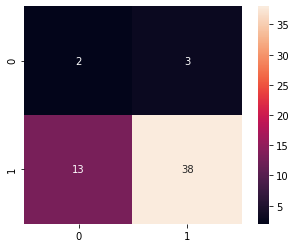

In [606]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix (y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True)


observation of this model example: The model predicted 112 instances were in the “benign (0)” stage while only 107 were and it predicted that 59 instances were in “malignant (1)” when only 58 was.

______________________________________________________________________________________________________________________

### 3.5 KNN - Changing some variables

So the results are.

How I came up with this result: I did multipe trails of testing. I started with using the 4 variables that had the strongest correlation with casualties

______________________________________________________________________________________________________________________


### 3.6 Quick comparison with Random forest

Proin eget tortor risus. Nulla quis lorem ut libero malesuada feugiat. Nulla porttitor accumsan tincidunt. Proin eget tortor risus. Nulla quis lorem ut libero malesuada feugiat. Nulla porttitor accumsan tincidunt.
______________________________________________________________________________________________________________________


In [607]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import sklearn as sk

In [608]:
#X = df3[['resource_officer', 'enrollment','S_R_officer', 'S_R_boyfriend', 'S_type_accidental', 'S_R_student', 'S_R_parent', 'S_R_teacher', 'S_type_suicide']]
#y = df3['casualties']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#X_train.head()

Cras ultricies ligula sed magna dictum porta. Curabitur arcu erat, accumsan id imperdiet et, porttitor at sem. Curabitur arcu erat, accumsan id imperdiet et, porttitor at sem. Donec sollicitudin molestie malesuada. Cras ultricies ligula sed magna dictum porta.

In [609]:
rf = RandomForestClassifier(random_state=1, n_estimators=100)
rf = rf.fit(X_train, y_train)

Cras ultricies ligula sed magna dictum porta. Curabitur arcu erat, accumsan id imperdiet et, porttitor at sem. Curabitur arcu erat, accumsan id imperdiet et, porttitor at sem. Donec sollicitudin molestie malesuada. Cras ultricies ligula sed magna dictum porta.

In [610]:
y_test_pred = rf.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_test_pred) #creates a "confusion matrix"
cm

array([[ 6,  9],
       [ 9, 32]])

Cras ultricies ligula sed magna dictum porta. Curabitur arcu erat, accumsan id imperdiet et, porttitor at sem. Curabitur arcu erat, accumsan id imperdiet et, porttitor at sem. Donec sollicitudin molestie malesuada. Cras ultricies ligula sed magna dictum porta.

In [611]:
y_pred = rf.predict(X_test) #the predicted values
conf_matrix = confusion_matrix(y_test, y_pred) #creates a "confusion matrix"
conf_matrix = pd.DataFrame(cm, index=['casualties (actual)', 'non-casualties (actual)'], columns = ['casualties (predicted)', 'non-casualties (predicted)']) 
conf_matrix

,casualties (predicted),non-casualties (predicted)
casualties (actual),6,9
non-casualties (actual),9,32


Cras ultricies ligula sed magna dictum porta. Curabitur arcu erat, accumsan id imperdiet et, porttitor at sem. Curabitur arcu erat, accumsan id imperdiet et, porttitor at sem. Donec sollicitudin molestie malesuada. Cras ultricies ligula sed magna dictum porta.

In [612]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.40      0.40      0.40        15
           1       0.78      0.78      0.78        41

    accuracy                           0.68        56
   macro avg       0.59      0.59      0.59        56
weighted avg       0.68      0.68      0.68        56



Cras ultricies ligula sed magna dictum porta. Curabitur arcu erat, accumsan id imperdiet et, porttitor at sem. Curabitur arcu erat, accumsan id imperdiet et, porttitor at sem. Donec sollicitudin molestie malesuada. Cras ultricies ligula sed magna dictum porta.

______________________________________________________________________________________________________________________

# References

Analysis | More than 240,000 students have experienced gun violence at school since Columbine. (2018, April 20). Washington Post. https://www.washingtonpost.com/graphics/2018/local/school-shootings-database/


W. Rich, Data-School-Shootings, (2019), GitHub repository, https://github.com/washingtonpost/data-school-shootings